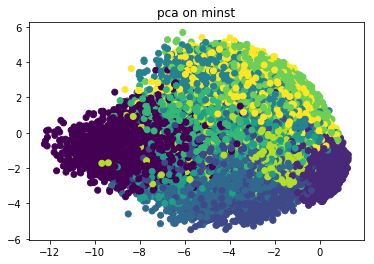

In [28]:
from numpy import mean
from numpy import cov
from numpy.linalg import eigh
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

(X_train, y_train), (X_test, y_test) = mnist.load_data()

_X_train = X_train
X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32') / 255.0


dims = 200

def pca(data):
    cova = cov(data.T) 
    values, vectors = eigh(cova)
    idx = np.argsort(values)[::-1]
    values = np.real(values[idx])
    vectors = np.real(vectors.T[idx])
    return values, vectors

values, vectors = pca(X_train)

P = X_train.dot(vectors[:dims].T)

plt.scatter(P[:, 0], P[:, 1],c=y_train)

plt.title("pca on minst")
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(P[:, 0], P[:, 1], P[:, 2],c=y_train)

In [20]:
images = np.dot(P, vectors[:dims])

In [21]:
images = images.reshape( -1, 28, 28)

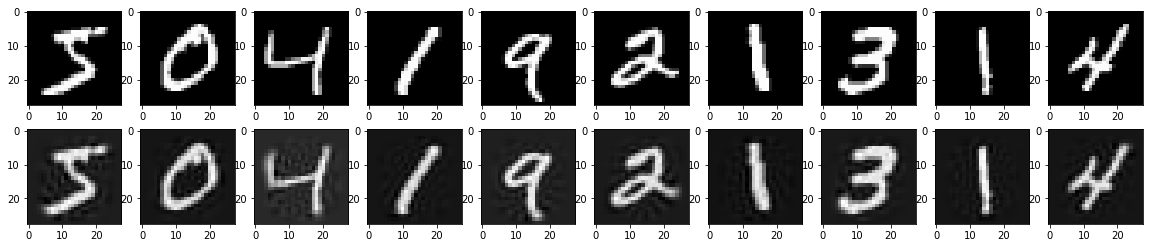

In [22]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(_X_train[i], cmap='gray')
    
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(images[i], cmap='gray')
    
plt.show()